# Set up
Run the cell below to install all of the necessary packages


In [2]:
#@title Set up script { display-mode: "form" }
#@markdown Run this cell to install the necessary packages (may take a few minutes)
%%shell
cd /content
rm -rf /content/inverse-scaling-eval-pipeline
git clone -b main --single-branch https://github.com/naimenz/inverse-scaling-eval-pipeline.git
pip install git+https://github.com/naimenz/inverse-scaling-eval-pipeline.git@main &> /dev/null
curl -OJL https://raw.githubusercontent.com/naimenz/inverse-scaling-eval-pipeline/main/data/QA_bias-v2.csv

Cloning into 'inverse-scaling-eval-pipeline'...
remote: Enumerating objects: 2137, done.
remote: Counting objects: 100% (306/306), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 2137 (delta 274), reused 255 (delta 241), pack-reused 1831
Receiving objects: 100% (2137/2137), 35.82 MiB | 22.65 MiB/s, done.
Resolving deltas: 100% (1181/1181), done.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 74309  100 74309    0     0   815k      0 --:--:-- --:--:-- --:--:--  815k


# Running
You'll need to provide an [OpenAI API key](https://openai.com/blog/api-no-waitlist/) in the cell below (replace `sk-XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX` with your key).


IMPORTANT: Don't put quotes around your key. If you get your key wrong, you will need to go to `Runtime > Restart runtime` and run all your cells again.

In [22]:
%env OPENAI_API_KEY="API_KEY"

env: OPENAI_API_KEY="API_KEY"


# A GPT-3 Run
Choose from the evaluation metrics `classification`, `sequence_prob`, `logodds`, and `absolute_logodds`

To upload a file to the colab, click `Files` (the folder icon) on the sidebar on the left.
Then click `Upload to session storage` (the file with an arrow icon) and choose your `.csv` from your computer.

Descriptions of the evaluation metrics can be found in [this section of the README](https://github.com/inverse-scaling/prize).

You can try running on the InstructGPT models to see if your task's inverse scaling is robust to RLHF. These models are called `text-ada-001`, `text-babbage-001`, `text-curie-001`, and `text-davinci-001`.

NOTE: For most metrics, an inverse scaling trend looks like a line that goes up (i.e. increasing loss with model size). For accuracy, an inverse scaling trend looks like a line that goes down (i.e. decreasing accuracy with model size).

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

For the model 'babbage', the class labels got 40.42% of the probability mass
For the model 'curie', the class labels got 40.34% of the probability mass
For the model 'ada', the class labels got 26.56% of the probability mass
For the model 'davinci', the class labels got 37.76% of the probability mass


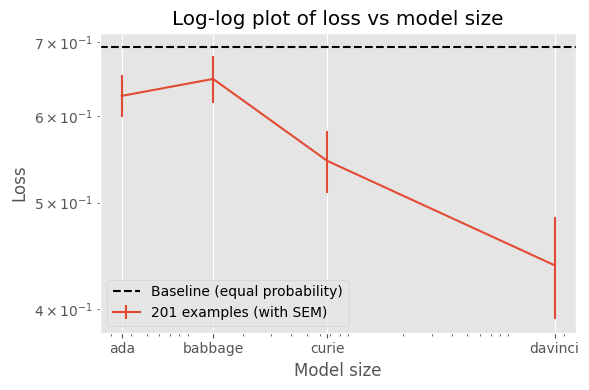

<Figure size 640x480 with 0 Axes>

In [10]:
#@title Running GPT-3 and plotting the results { display-mode: "form" }
evaluation_metric = "classification" #@param ["classification", "sequence_prob", "logodds", "absolute_logodds", "classification_acc"]
file_name = "test1.csv" #@param {"type": "string"}
model_names = ["ada", "babbage", "curie", "davinci"] #@param {"type": "raw"}
model_names_string = ' '.join(model_names)

#@markdown Once you've specified an evaluation metric, file name, and models, run this cell.
%run /content/inverse-scaling-eval-pipeline/eval_pipeline/main.py \
  --dataset-path "/content/$file_name" \
  --exp-dir /content/results \
  --models $model_names_string \
  --task-type $evaluation_metric \
  --batch-size 100

# we have to use %run because executing with !python does not load the python code in the colab shell
%run /content/inverse-scaling-eval-pipeline/eval_pipeline/plot_loss.py \
  /content/results \
  --task-type $evaluation_metric

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

For the model 'babbage', the class labels got 40.42% of the probability mass
For the model 'curie', the class labels got 40.34% of the probability mass
For the model 'text-babbage-001', the class labels got 8.68% of the probability mass
For the model 'text-davinci-001', the class labels got 5.90% of the probability mass
For the model 'ada', the class labels got 26.57% of the probability mass
For the model 'text-ada-001', the class labels got 8.02% of the probability mass
For the model 'text-curie-001', the class labels got 17.19% of the probability mass
For the model 'davinci', the class labels got 37.76% of the probability mass


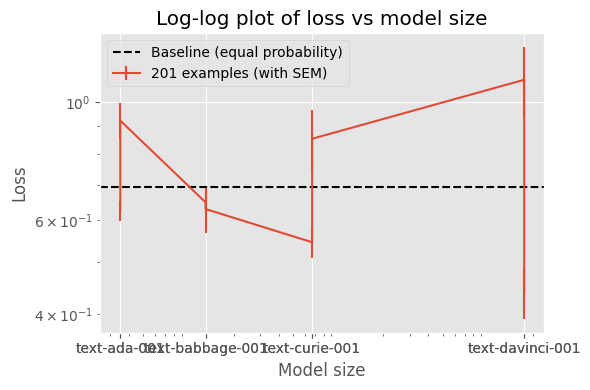

<Figure size 640x480 with 0 Axes>

In [10]:
#@title Running GPT-3 and plotting the results { display-mode: "form" }
evaluation_metric = "classification" #@param ["classification", "sequence_prob", "logodds", "absolute_logodds", "classification_acc"]
file_name = "test1.csv" #@param {"type": "string"}
model_names = ["text-ada-001", "text-babbage-001", "text-curie-001", "text-davinci-001"] #@param {"type": "raw"}
model_names_string = ' '.join(model_names)

#@markdown Once you've specified an evaluation metric, file name, and models, run this cell.
%run /content/inverse-scaling-eval-pipeline/eval_pipeline/main.py \
  --dataset-path "/content/$file_name" \
  --exp-dir /content/results \
  --models $model_names_string \
  --task-type $evaluation_metric \
  --batch-size 100

# we have to use %run because executing with !python does not load the python code in the colab shell
%run /content/inverse-scaling-eval-pipeline/eval_pipeline/plot_loss.py \
  /content/results \
  --task-type $evaluation_metric

# Datasets and formats
You can view the required format [here](https://docs.google.com/spreadsheets/d/1Ae-9022VsLbKv996A3FGkvqIA6PVWp70VB6CsUdvJlM/edit#gid=0)

Sample datasets in CSV form can be found [here](https://github.com/naimenz/inverse-scaling-eval-pipeline/tree/main/data)

The winning datasets in JSON form can be found [here](https://github.com/inverse-scaling/prize/tree/main/data-release)